# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** [Stevano Nathan Hamtoyo]
- **Email:** [m232b4ky4208@bangkit.academy]
- **ID Dicoding:** [stevanonathanh]

## Menentukan Pertanyaan Bisnis

- Antara kota Aotizhongxin dan Changping, kota yang memiliki tingkat polusi udara tertinggi berdasarkan rata-rata indikator O3 tiap tahunnya dan tahun berapa yang memiliki kadar O3 paling baik setiap kota?
- Setelah mengetahui tahun dengan rata-rata kadar O3 terbaik, lakukan analisis rata-rata kadar SO2 pada tahun tersebut. Apakah tahun tersebut merupakan tahun terbaik untuk setiap kota dari segi kadar SO2?

## Import Semua Packages/Library yang Digunakan

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [16]:
# Membaca file
Aotizhongxin = pd.read_csv('/content/Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping = pd.read_csv('/content/Data/PRSA_Data_Changping_20130301-20170228.csv')


**Insight:**
- Membaca file Aotizhongxin dan membaca file Changping yang berada di content

### Assessing Data

In [6]:
Aotizhongxin.info()
Aotizhongxin.isna().sum()
print("Jumlah duplikasi: ", Aotizhongxin.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


In [7]:
Changping.info()
Changping.isna().sum()
print("Jumlah duplikasi: ", Changping.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah duplikasi:  0


**Insight:**
- Mencari duplikat yang terdapat didalam data Aotizhongxin dan Changping

### Cleaning Data

In [8]:
Aotizhongxin[Aotizhongxin.isna()]
Aotizhongxin.dropna(axis=0, inplace=True)
Changping[Changping.isna()]
Changping.dropna(axis=0, inplace=True)
print(Aotizhongxin.info())
print(Changping.info())
Aotizhongxin.fillna(value=0, inplace=True)
Changping.fillna(method='ffill', inplace=True)
Aotizhongxin.drop_duplicates(inplace=True)
Changping.drop_duplicates(inplace=True)
Aotizhongxin.to_csv('Aotizhongxin_cleaned.csv', index=False)
Changping.to_csv('Changping_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 31815 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       31815 non-null  int64  
 1   year     31815 non-null  int64  
 2   month    31815 non-null  int64  
 3   day      31815 non-null  int64  
 4   hour     31815 non-null  int64  
 5   PM2.5    31815 non-null  float64
 6   PM10     31815 non-null  float64
 7   SO2      31815 non-null  float64
 8   NO2      31815 non-null  float64
 9   CO       31815 non-null  float64
 10  O3       31815 non-null  float64
 11  TEMP     31815 non-null  float64
 12  PRES     31815 non-null  float64
 13  DEWP     31815 non-null  float64
 14  RAIN     31815 non-null  float64
 15  wd       31815 non-null  object 
 16  WSPM     31815 non-null  float64
 17  station  31815 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 32681 entries, 0 to 350

<ipython-input-8-a0f62c2705ef>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Changping.fillna(method='ffill', inplace=True)


**Insight:**
- Mengganti nilai yang hilang dengan 0
- Mengganti nilai yang hilang dengan nilai sebelumnya

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
# Memuat dataset
df = pd.read_csv('/content/Aotizhongxin_cleaned.csv')

# Menghitung rata-rata kadar O3 per tahun kota Aotizhongxin
o3_avg_per_year_Aotizhongxin = df.groupby(['year', 'station'])['O3'].mean().reset_index()

# Menambahkan kolom baru untuk kategori "Bagus" atau "Tidak Bagus"
o3_avg_per_year_Aotizhongxin['Kategori'] = o3_avg_per_year_Aotizhongxin['O3'].apply(lambda x: 'Bagus' if x <= 50 else 'Tidak Bagus')

# Menampilkan hasil dengan kategori
print(o3_avg_per_year_Aotizhongxin)


   year       station         O3     Kategori
0  2013  Aotizhongxin  48.035401        Bagus
1  2014  Aotizhongxin  49.340435        Bagus
2  2015  Aotizhongxin  63.930616  Tidak Bagus
3  2016  Aotizhongxin  62.609028  Tidak Bagus
4  2017  Aotizhongxin  47.651979        Bagus


In [10]:
# Memuat dataset
df = pd.read_csv('/content/Changping_cleaned.csv')

# Menghitung rata-rata kadar O3 per tahun kota Changping
o3_avg_per_year_changping = df.groupby(['year', 'station'])['O3'].mean().reset_index()

# Menambahkan kolom baru untuk kategori "Bagus" atau "Tidak Bagus"
o3_avg_per_year_changping['Kategori'] = o3_avg_per_year_changping['O3'].apply(lambda x: 'Bagus' if x <= 50 else 'Tidak Bagus')

# Menampilkan hasil dengan kategori
print(o3_avg_per_year_changping)


   year    station         O3     Kategori
0  2013  Changping  60.441771  Tidak Bagus
1  2014  Changping  62.456329  Tidak Bagus
2  2015  Changping  57.671939  Tidak Bagus
3  2016  Changping  53.836624  Tidak Bagus
4  2017  Changping  33.405166        Bagus


In [11]:
# Memuat dataset
data = pd.read_csv('/content/Aotizhongxin_cleaned.csv')

# Hitung rata-rata SO2 per tahun kota Aotizhongxin
average_so2_per_year_station_Aotizhongxin = data.groupby(['year', 'station'])['SO2'].mean().reset_index()

# Menambahkan kategori kualitas udara berdasarkan SO2
average_so2_per_year_station_Aotizhongxin['Kualitas_Udara'] = average_so2_per_year_station_Aotizhongxin['SO2'].apply(
    lambda x: 'Baik' if x <= 20 else 'Sedang' if x <= 40 else 'Tidak Baik')

# Tampilkan hasil
print(average_so2_per_year_station_Aotizhongxin)


   year       station        SO2 Kualitas_Udara
0  2013  Aotizhongxin  23.180283         Sedang
1  2014  Aotizhongxin  21.334105         Sedang
2  2015  Aotizhongxin  14.486997           Baik
3  2016  Aotizhongxin  10.814464           Baik
4  2017  Aotizhongxin  20.958178         Sedang


In [12]:
# Memuat dataset
data = pd.read_csv('/content/Changping_cleaned.csv')

# Hitung rata-rata SO2 per tahun kota Changping
average_so2_per_year_station_Changping = data.groupby(['year', 'station'])['SO2'].mean().reset_index()

# Menambahkan kategori kualitas udara berdasarkan SO2
average_so2_per_year_station_Changping['Kualitas_Udara'] = average_so2_per_year_station_Changping['SO2'].apply(
    lambda x: 'Baik' if x <= 20 else 'Sedang' if x <= 40 else 'Tidak Baik')

# Tampilkan hasil
print(average_so2_per_year_station_Changping)


   year    station        SO2 Kualitas_Udara
0  2013  Changping  20.627632         Sedang
1  2014  Changping  20.930534         Sedang
2  2015  Changping  11.789714           Baik
3  2016  Changping   8.117626           Baik
4  2017  Changping  16.511439           Baik


**Insight:**
- Mencari rata-rata kadar O3 pertahun pada kota Aotizhongxin dan Changping lalu mengkelompokkan menjadi bagus dan tidak bagus. Dikatakan bagus jika rata-rata kadar O3 dibawah sama dengan 50 dan lainnya jika dikatakan tidak bagus.
- Mencari rata-rata kadar SO2 pertahun pada kota Aotizhongxin dan Changping lalu mengkelompokkan menjadi baik, sedang, dan tidak baik. Di katakan baik jika kadar rata-rata berada di bawah sama dengan 20, untuk sedang kadar rata-rata berada di bawah sama dengan 40, dan lainnya jika dikatakan tidak baik.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

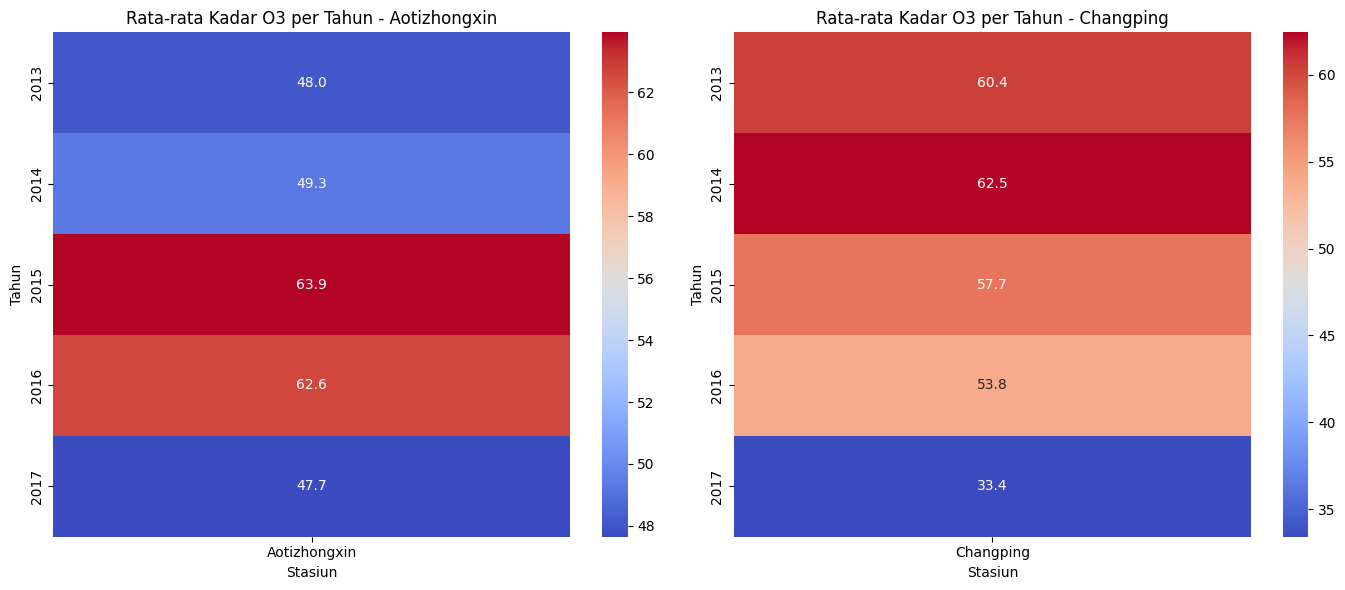

In [13]:
# Memuat dataset Aotizhongxin
df_aotizhongxin = pd.read_csv('/content/Aotizhongxin_cleaned.csv')

# Menghitung rata-rata kadar O3 per tahun untuk Aotizhongxin
o3_avg_per_year_aotizhongxin = df_aotizhongxin.groupby(['year', 'station'])['O3'].mean().reset_index()

# Membuat pivot table untuk heatmap Aotizhongxin
pivot_aotizhongxin = o3_avg_per_year_aotizhongxin.pivot(index='year', columns='station', values='O3')

# Memuat dataset Changping
df_changping = pd.read_csv('/content/Changping_cleaned.csv')

# Menghitung rata-rata kadar O3 per tahun untuk Changping
o3_avg_per_year_changping = df_changping.groupby(['year', 'station'])['O3'].mean().reset_index()

# Membuat pivot table untuk heatmap Changping
pivot_changping = o3_avg_per_year_changping.pivot(index='year', columns='station', values='O3')

# Menyiapkan gambar untuk plot heatmap
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot heatmap untuk Aotizhongxin
sns.heatmap(pivot_aotizhongxin, ax=axes[0], cmap='coolwarm', annot=True, fmt=".1f")
axes[0].set_title('Rata-rata Kadar O3 per Tahun - Aotizhongxin')
axes[0].set_xlabel('Stasiun')
axes[0].set_ylabel('Tahun')

# Plot heatmap untuk Changping
sns.heatmap(pivot_changping, ax=axes[1], cmap='coolwarm', annot=True, fmt=".1f")
axes[1].set_title('Rata-rata Kadar O3 per Tahun - Changping')
axes[1].set_xlabel('Stasiun')
axes[1].set_ylabel('Tahun')

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

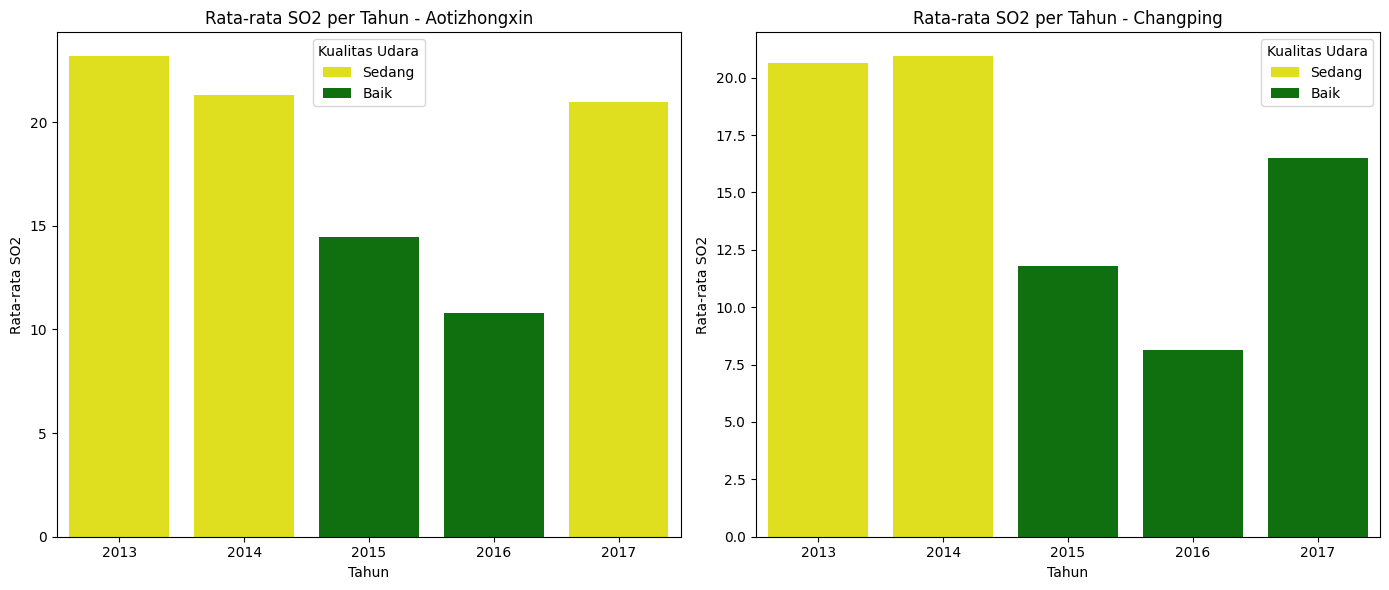

In [14]:
# Memuat dataset Aotizhongxin
data_aotizhongxin = pd.read_csv('/content/Aotizhongxin_cleaned.csv')

# Hitung rata-rata SO2 per tahun dan stasiun untuk Aotizhongxin
average_so2_per_year_station_aotizhongxin = data_aotizhongxin.groupby(['year', 'station'])['SO2'].mean().reset_index()

# Menambahkan kategori kualitas udara berdasarkan SO2 untuk Aotizhongxin
average_so2_per_year_station_aotizhongxin['Kualitas_Udara'] = average_so2_per_year_station_aotizhongxin['SO2'].apply(
    lambda x: 'Baik' if x <= 20 else 'Sedang' if x <= 40 else 'Tidak Baik')

# Memuat dataset Changping
data_changping = pd.read_csv('/content/Changping_cleaned.csv')

# Hitung rata-rata SO2 per tahun dan stasiun untuk Changping
average_so2_per_year_station_changping = data_changping.groupby(['year', 'station'])['SO2'].mean().reset_index()

# Menambahkan kategori kualitas udara berdasarkan SO2 untuk Changping
average_so2_per_year_station_changping['Kualitas_Udara'] = average_so2_per_year_station_changping['SO2'].apply(
    lambda x: 'Baik' if x <= 20 else 'Sedang' if x <= 40 else 'Tidak Baik')

# Menyiapkan gambar untuk plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Warna untuk setiap kategori
color_mapping = {
    'Baik': 'green',
    'Sedang': 'yellow',
    'Tidak Baik': 'red'
}

# Plot SO2 untuk Aotizhongxin
sns.barplot(data=average_so2_per_year_station_aotizhongxin, x='year', y='SO2', hue='Kualitas_Udara', palette=color_mapping, ax=axes[0])
axes[0].set_title('Rata-rata SO2 per Tahun - Aotizhongxin')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Rata-rata SO2')
axes[0].legend(title='Kualitas Udara')

# Plot SO2 untuk Changping
sns.barplot(data=average_so2_per_year_station_changping, x='year', y='SO2', hue='Kualitas_Udara', palette=color_mapping, ax=axes[1])
axes[1].set_title('Rata-rata SO2 per Tahun - Changping')
axes[1].set_xlabel('Tahun')
axes[1].set_ylabel('Rata-rata SO2')
axes[1].legend(title='Kualitas Udara')

# Menampilkan plot
plt.tight_layout()
plt.show()


**Insight:**
- Untuk pertanyaan pertama berhasil menemukan kota yang memiliki tingkat polusi udara tertinggi berdasarkan rata-rata indikator O3 tiap tahunnya dan berhasil untuk mencari tahun yang memiliki kadar O3 paling baik setiap kota.
- Untuk pertanyaan kedua berhasil melakukan analisis rata-rata kadar SO2 pada tahun tersebut dan tahun tersebut belum tentu tahun terbaik untuk setiap kota dari segi kadar SO2.

## Analisis Lanjutan (Opsional)

## Conclusion

- Untuk kesimpulan pertanyaan pertama berdasarkan data yang tersedia dan analisis yang sudah dilakukan, kota yang memiliki tingkat polusi udara tertinggi berdasarkan rata-rata indikator O3 tiap tahunnya adalah kota Aotizhongxin. Untuk tahun yang memiliki kadar O3 paling baik yaitu untuk kota Aotizhongxin dan Changping berada di tahun 2017.
- Untuk kesimpulan kedua, rata-rata kadar SO2 di setiap kota merupakan bukan yang kadar rata-rata terbaik. Rata-rata terbaik untuk kota Aotizhongxin dan Changping berada di tahun 2016